<a href="https://colab.research.google.com/github/satishgaurav/DeepChem_MolGAN/blob/master/gan_with_mol_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/satishgaurav/DeepChem_MolGAN.git
%cd DeepChem_MolGAN

Cloning into 'DeepChem_MolGAN'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 116 (delta 48), reused 68 (delta 21), pack-reused 0
Receiving objects: 100% (116/116), 2.53 MiB | 4.20 MiB/s, done.
Resolving deltas: 100% (48/48), done.
/content/DeepChem_MolGAN


In [2]:
!pwd

/content/DeepChem_MolGAN


In [3]:
## Print all variable
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
## Install deepchem 
!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
conda_installer.install()
!/root/miniconda/bin/conda info -e

!pip install --pre deepchem

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3501  100  3501    0     0  26930      0 --:--:-- --:--:-- --:--:-- 26930


add /root/miniconda/lib/python3.7/site-packages to PYTHONPATH
python version: 3.7.10
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit, openmm, pdbfixer
added conda-forge to channels
added omnia to channels
done
conda packages installation finished!


# conda environments:
#
base                  *  /root/miniconda

     |████████████████████████████████| 563kB 4.4MB/s 


In [5]:
import tensorflow as tf 
import numpy as np 
import deepchem as dc
import rdkit as rdkit
import rdkit.Chem as Chem
import rdkit.Chem.PandasTools as pt
import pandas as pd

In [6]:
print('Tensorflow version:', tf.__version__) 
print('GPU avilable:', tf.test.gpu_device_name())
print('RDKit version: ', rdkit.__version__)
print('DeepChem version', dc.__version__)

Tensorflow version: 2.4.1
GPU avilable: 
RDKit version:  2020.09.1
DeepChem version 2.6.0.dev


In [7]:
data = pd.read_csv('data/QM9_HAC_5_9_.csv')
data.head()

,SMILES
0,CC(C)=NO
1,N1C=CC=C1
2,N1C=CN=C1
3,O1C=CC=C1
4,O1C=CN=C1


In [8]:
reduced_data = list(data['SMILES'])
import random
random.shuffle(reduced_data)

In [9]:
mols = list(filter(lambda x: x is not None, [Chem.MolFromSmiles(x) for x in reduced_data]))
print('No. of molecules obtained: ', len(mols))

No. of molecules obtained:  132432


In [66]:
%%bash 

rm -r data/images  ## remove if you want to created a new one!

directory_name='./data/images/'
if [ -d "$directory_name" ]; then
    echo "$directory_name exists as a directory!"
else
    mkdir $directory_name
    cd $directory_name 
    mkdir color
    mkdir gray
    echo "$directory_name didn't existed, creted the same!"
    echo "color directory created"
    echo "gray directory created"
fi

./data/images/ didn't existed, creted the same!
color directory created
gray directory created


In [78]:
from rdkit.Chem.Draw import rdMolDraw2D

image_path = "./data/images/color/"

for mol in mols[0:508]:
  d = rdMolDraw2D.MolDraw2DCairo(28, 28)
  rdMolDraw2D.PrepareAndDrawMolecule(d,mol)
  mol_name = Chem.MolToSmiles(mol)
  d.WriteDrawingText("%s%s.png" % (image_path, mol_name))

In [79]:
mols_list = list(filter(lambda x: x is not None, [Chem.MolToSmiles(x) for x in mols[0:508]]))
print(mols_list)
print(len(mols_list))

['C[C@H]1[C@H]2[C@@H]3[C@H]4C[N@H+]4[C@H]2[C@H]13', 'O=C1CC(O)([C@H]2CN2)C1', 'O=C[C@H](O)C#C[C@H]1CO1', 'C[C@@H](C#N)[C@H]1CN1C=O', 'Nc1nc2onnc2[nH]1', 'O[C@H]1C[C@@H]2[C@@H]3[C@H]1[C@@H]1[C@H]2[C@H]31', 'C[C@@]1(CO)C[C@H]2[C@@H](O)[C@H]21', 'Nc1nccncc1=O', 'N#C[C@H](N)[C@@H](N)C(N)=O', 'C#C[C@H]1OCC[C@@]12CN2', 'C#C[C@]1(C)C[C@H](C)[C@@H]1O', 'C[C@H]1O[C@H]1[C@@]1(C)CO1', 'C#C[C@@]12O[C@@H]1C[C@@H]2CO', 'Cc1noc2nc[nH]c12', 'OCCC[C@@H](O)CCO', 'CC[C@@]12C[C@H]3O[C@@H]1[C@]32O', 'C1=C[C@@H]2[C@@H]3CC(=CC1)[C@H]23', 'C[C@H]1[C@]2(C)C=C[C@@]1(C)O2', 'N#C[C@]1(C=O)[C@H]2CO[C@H]21', 'CCCCc1ncno1', 'O=COC[C@@H]1O[C@@H]1CO', 'CCC(=O)N(C)C=O', 'CC#CC(C)(C=O)C=O', 'CC1=C[C@H]2O[C@H]2C=CC1', 'C[C@@]1(C#N)C[C@H]2C[N@H+]21', 'N#CCCc1ccn[nH]1', 'Cc1noc([C@@H](C)N)n1', 'C#C[C@@H]1[C@@H]2[CH-]C[N@H+]3[C@@H]2[C@@H]13', 'OC[C@@H]1[C@@H]2C=C[C@@H]3[C@H]1[N@H+]23', 'C[C@@](O)(CO)C1COC1', 'CC[C@@H](CO)CCOC', 'N#CC1=CCCOC1', 'N#C[C@H]1CCC[C@H](O)C1', 'NCCc1noc(=O)[nH]1', 'CC(C)C[C@@H](C)OC=O', 'O[C@H]1CCO

In [80]:
from deepchem.models.optimizers import ExponentialDecay
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, Reshape
import matplotlib.pyplot as plot
import matplotlib.gridspec as gridspec
%matplotlib inline

In [81]:
import cv2
import os 
from os import listdir, makedirs
from os.path import isfile, join

path = r'./data/images/color' # Source Folder
dstpath = r'./data/images/gray' # Destination Folder

# try:
#     makedirs(dstpath)
# except:
#     print ("Directory already exist, images will be written in the same folder")

# Folder won't used
files = [f for f in listdir(path) if isfile(join(path,f))] 

for image in files:
    try:
        img = cv2.imread(os.path.join(path,image))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = 255 - gray ## invert intensity 
        dstPath = join(dstpath, image)
        cv2.imwrite(dstPath, gray)
    except:
        print ("{} is not converted".format(image))

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

In [82]:
len(files)

500

In [83]:
import glob
from PIL import Image
mols_list = glob.glob('./data/images/gray/*.png')
x = np.array([np.array(Image.open(mol_name)) for mol_name in mols_list])

In [84]:
x.shape

(500, 28, 28)

In [85]:
images = x.reshape((-1, 28, 28, 1))/255
print(images.shape)
dataset = dc.data.NumpyDataset(images)
print(dataset.get_shape())

(500, 28, 28, 1)
((500, 28, 28, 1), (500, 1), (500, 1), (500,))


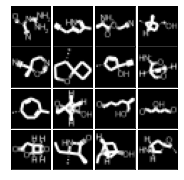

In [86]:
def plot_digits(im):
  plot.figure(figsize=(3, 3))
  grid = gridspec.GridSpec(4, 4, wspace=0.05, hspace=0.05)
  for i, g in enumerate(grid):
    ax = plot.subplot(g)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(im[i,:,:,0], cmap='gray')
plot_digits(images)

In [95]:
class DigitGAN(dc.models.WGAN):

  def get_noise_input_shape(self):
    return (10,)

  def get_data_input_shapes(self):
    return [(28, 28, 1)]

  def create_generator(self):
    return tf.keras.Sequential([
        Dense(7*7*8, activation=tf.nn.relu),
        Reshape((7, 7, 8)),
        Conv2DTranspose(filters=16, kernel_size=5, strides=2, activation=tf.nn.relu, padding='same'),
        Conv2DTranspose(filters=1, kernel_size=5, strides=2, activation=tf.sigmoid, padding='same')
    ])

  def create_discriminator(self):
    return tf.keras.Sequential([
        Conv2D(filters=32, kernel_size=5, strides=2, activation=tf.nn.leaky_relu, padding='same'),
        Conv2D(filters=64, kernel_size=5, strides=2, activation=tf.nn.leaky_relu, padding='same'),
        Dense(1, activation=tf.math.softplus)
    ])

gan = DigitGAN(learning_rate=ExponentialDecay(0.001, 0.9, 5000))

In [98]:
def iterbatches(epochs):
  for i in range(epochs):
    for batch in dataset.iterbatches(batch_size=gan.batch_size):
      yield {gan.data_inputs[0]: batch[0]}

gan.fit_gan(iterbatches(400), generator_steps=0.2, checkpoint_interval=5000)

Ending global_step 2499: generator average loss 0.503859, discriminator average loss -0.0345122
TIMING: model fitting took 363.050 s


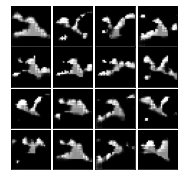

In [99]:
plot_digits(gan.predict_gan_generator(batch_size=16))

## References: 
  1. https://www.rdkit.org/docs/GettingStartedInPython.html